In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas import read_csv, concat
%matplotlib inline

## Descriptive Analysis (Logistic Regression)

#### Diagnostics

In [3]:
## Define I/O parameters.
stan_models = ['logit_sh', 'logit_trt']
sessions = [1,2,3]
models = [1,2,3]

for stan_model in stan_models:
    
    for s in sessions:
        
        for m in models:
            
            ## Load summary file.
            f = os.path.join('stan_results', 'logit', f'{stan_model}_s{s}_m{m}_summary.tsv')
            df = read_csv(f, sep='\t', index_col='name')
            
            if np.any(df.query('R_hat > 1.01')):
                print(f'{stan_model}_s{s}_m{m}\t  N =', df.query('R_hat > 1.01').shape[0])

logit_trt_s3_m2	  N = 1
logit_trt_s3_m3	  N = 2


#### Split-Half Reliability

In [ ]:
## Define I/O parameters.
stan_model = 'logit_sh'
sessions = [1,2,3]
models = [1,2,3]

## 
data = []
for s, m in [(s,m) for s in sessions for m in models]:
    
    ## Load summary file.
    f = os.path.join('stan_results', 'logit', f'{stan_model}_s{s}_m{m}_summary.tsv')
    df = read_csv(f, sep='\t', index_col='name')
    
    ## Extract ICCs.
    rho = df.T.filter(regex='rho').T.filter(regex='%')
    
    ## Add metadata. Append.
    rho.insert(0, 'model', m)
    rho.insert(1, 'session', s)
    data.append(rho)
    
## Concatenate DataFrames.
data = concat(data).reset_index()

## Initialize canvas.
g = sns.FacetGrid(data, row='model', col='session', height=2.5, aspect=1.25)

## Plot ICCs.
g.map(sns.barplot, 'name', '50%', order=data.name.unique())

## Add markers.
for ax in g.axes.flatten():
    ax.axhline(0.0, lw=1.5, color='0.0')
    ax.axhline(0.7, lw=0.8, color='0.5', linestyle='--')

## Add detail.
g.set(ylim=(-0.2,1.0))

#### Test-Retest Reliability

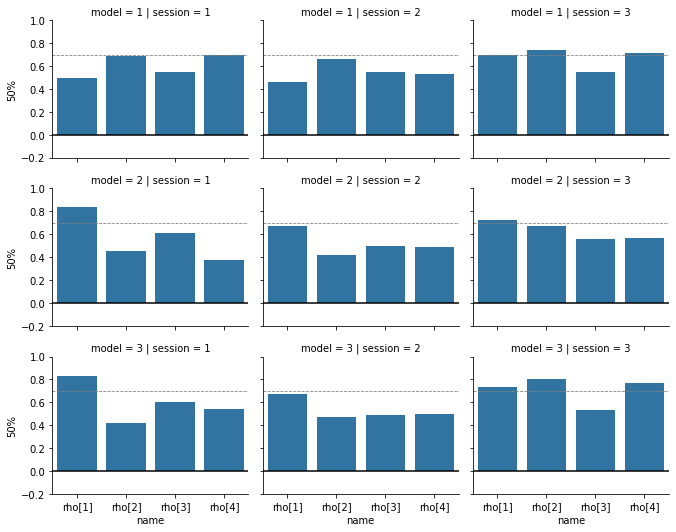

In [4]:
## Define I/O parameters.
stan_model = 'logit_trt'
sessions = [1,2,3]
models = [1,2,3]

## 
data = []
for s, m in [(s,m) for s in sessions for m in models]:
    
    ## Load summary file.
    f = os.path.join('stan_results', 'logit', f'{stan_model}_s{s}_m{m}_summary.tsv')
    df = read_csv(f, sep='\t', index_col='name')
    
    ## Extract ICCs.
    rho = df.T.filter(regex='rho').T.filter(regex='%')
    
    ## Add metadata. Append.
    rho.insert(0, 'model', m)
    rho.insert(1, 'session', s)
    data.append(rho)
    
## Concatenate DataFrames.
data = concat(data).reset_index()

## Initialize canvas.
g = sns.FacetGrid(data, row='model', col='session', height=2.5, aspect=1.25)

## Plot ICCs.
g.map(sns.barplot, 'name', '50%', order=data.name.unique())

## Add markers.
for ax in g.axes.flatten():
    ax.axhline(0.0, lw=1.5, color='0.0')
    ax.axhline(0.7, lw=0.8, color='0.5', linestyle='--')

## Add detail.
g.set(ylim=(-0.2,1.0))